You are stacking blocks to form a pyramid. Each block has a color, which is represented by a single letter. Each row of blocks contains one less block than the row beneath it and is centered on top.

To make the pyramid aesthetically pleasing, there are only specific triangular patterns that are allowed. A triangular pattern consists of a single block stacked on top of two blocks. The patterns are given as a list of three-letter strings allowed, where the first two characters of a pattern represent the left and right bottom blocks respectively, and the third character is the top block.

    For example, "ABC" represents a triangular pattern with a 'C' block stacked on top of an 'A' (left) and 'B' (right) block. Note that this is different from "BAC" where 'B' is on the left bottom and 'A' is on the right bottom.

You start with a bottom row of blocks bottom, given as a single string, that you must use as the base of the pyramid.

Given bottom and allowed, return true if you can build the pyramid all the way to the top such that every triangular pattern in the pyramid is in allowed, or false otherwise.

 

Example 1:

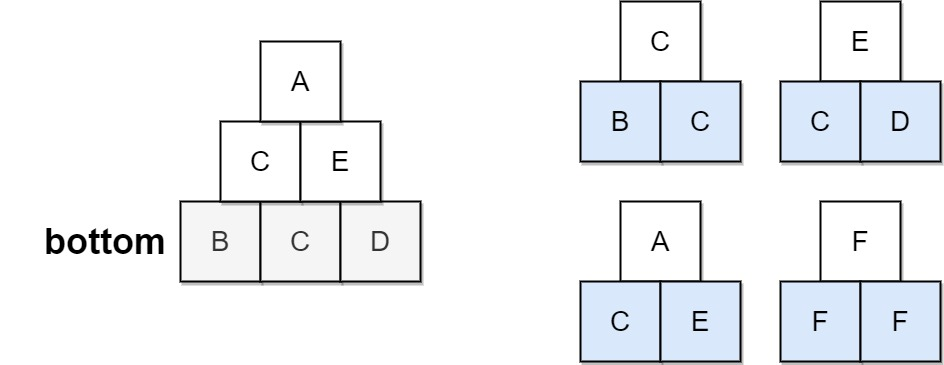

Input: bottom = "BCD", allowed = ["BCC","CDE","CEA","FFF"]
Output: true
Explanation: The allowed triangular patterns are shown on the right.
Starting from the bottom (level 3), we can build "CE" on level 2 and then build "A" on level 1.
There are three triangular patterns in the pyramid, which are "BCC", "CDE", and "CEA". All are allowed.

Example 2:

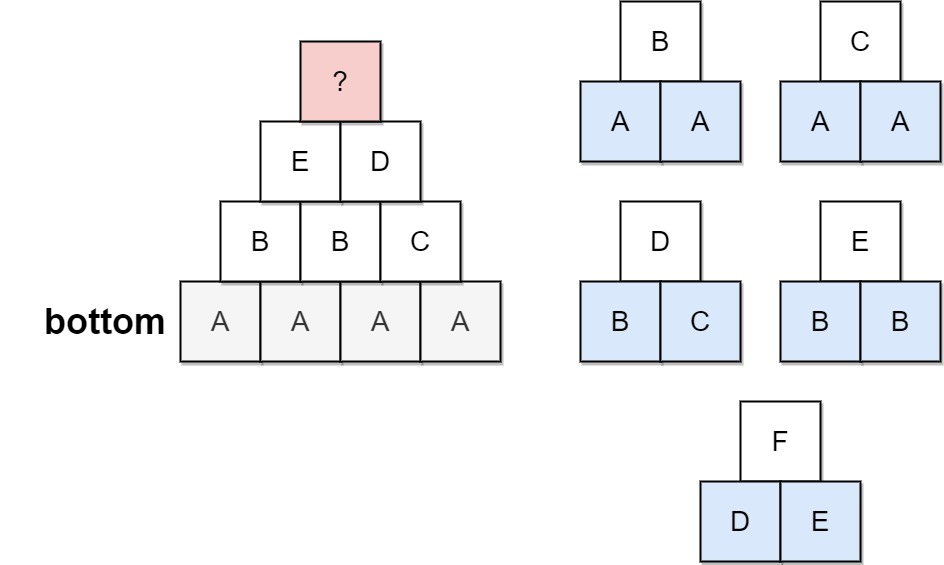

Input: bottom = "AAAA", allowed = ["AAB","AAC","BCD","BBE","DEF"]
Output: false
Explanation: The allowed triangular patterns are shown on the right.
Starting from the bottom (level 4), there are multiple ways to build level 3, but trying all the possibilites, you will get always stuck before building level 1.

 

Constraints:

    2 <= bottom.length <= 6
    0 <= allowed.length <= 216
    allowed[i].length == 3
    The letters in all input strings are from the set {'A', 'B', 'C', 'D', 'E', 'F'}.
    All the values of allowed are unique.



In [ ]:
class Solution:
    def pyramidTransition(self, bottom: str, allowed: List[str]) -> bool:
        T = collections.defaultdict(set)
        for u, v, w in allowed:
            T[u, v].add(w)

        @cache
        def solve(A):
            if len(A) == 1: return True
            return any(solve(cand) for cand in build(A, []))

        def build(A, ans, i = 0):
            if i + 1 == len(A):
                yield "".join(ans)
            else:
                for w in T[A[i], A[i+1]]:
                    ans.append(w)
                    for result in build(A, ans, i+1):
                        yield result
                    ans.pop()

        return solve(bottom)

In [ ]:
class Solution:
    def pyramidTransition(self, bottom: str, allowed: List[str]) -> bool:
        T = defaultdict(set)
        for u, v, w in allowed:
            T[u, v].add(w)

        @cache
        def solve(s):
            if len(s) == 1: 
                return True
            return any(solve(cand) for cand in build(s, ""))

        def build(curr, nxt):
            if len(nxt) == len(curr) - 1:
                yield nxt
            else:
                # pos = len(nxt)
                for w in T[curr[len(nxt)], curr[len(nxt) + 1]]:
                    yield from build(curr, nxt + w)

        return solve(bottom)